In [1]:
import pandas as pd
import hvplot.pandas
import requests
import json
import os
import csv
from pathlib import Path
from api_keys import geoapify_key
import numpy as np
import matplotlib.pyplot as plt


In [2]:
csv_path = Path('Resources', 'Metro_new_listings.csv')
newlistings_df = pd.read_csv(csv_path, encoding="utf-8")
newlistings_df.tail()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/18,2/28/18,3/31/18,4/30/18,5/31/18,...,9/30/22,10/31/22,11/30/22,12/31/22,1/31/23,2/28/23,3/31/23,4/30/23,5/31/23,6/30/23
922,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
923,394743,936,"Ketchikan, AK",msa,AK,9.0,11.0,17.0,11.0,17.0,...,17.0,9.0,7.0,8.0,11.0,15.0,25.0,15.0,11.0,11.0
924,753874,937,"Craig, CO",msa,CO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,14.0,16.0,30.0,27.0,36.0
925,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.0,6.0,14.0,10.0,20.0,19.0
926,394767,939,"Lamesa, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,6.0,10.0,13.0


In [3]:
# Creating City Column
newlistings_df["City"] = newlistings_df["RegionName"]
newlistings_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/18,2/28/18,3/31/18,4/30/18,5/31/18,...,10/31/22,11/30/22,12/31/22,1/31/23,2/28/23,3/31/23,4/30/23,5/31/23,6/30/23,City
0,102001,0,United States,country,NaN,323255.0,376081.0,476113.0,509438.0,538099.0,...,315749.0,240504.0,169573.0,235076.0,247763.0,333606.0,332116.0,367732.0,376507.0,United States
1,394913,1,"New York, NY",msa,NY,14880.0,22651.0,22492.0,25714.0,25627.0,...,13088.0,9711.0,5829.0,9754.0,10439.0,14598.0,13820.0,14360.0,13628.0,"New York, NY"
2,753899,2,"Los Angeles, CA",msa,CA,8136.0,9261.0,10164.0,10597.0,11556.0,...,6338.0,4806.0,3048.0,4699.0,4988.0,6370.0,6156.0,6830.0,6941.0,"Los Angeles, CA"
3,394463,3,"Chicago, IL",msa,IL,8645.0,11908.0,17472.0,16696.0,16869.0,...,8643.0,6271.0,3899.0,6043.0,7047.0,9530.0,9649.0,10865.0,11066.0,"Chicago, IL"
4,394514,4,"Dallas, TX",msa,TX,7389.0,7894.0,10535.0,11797.0,11995.0,...,7039.0,5459.0,3983.0,5188.0,5291.0,8159.0,8879.0,9467.0,10002.0,"Dallas, TX"


In [4]:
#Rename 2018 
newlistings_df = newlistings_df.rename(columns={"1/31/18":"2018 January",
                                          "2/28/18":"2018 February",
                                          "3/31/18":"2018 March",
                                          "4/30/18":"2018 April",
                                          "5/31/18":"2018 May",
                                          "6/30/18":"2018 June",
                                          "7/31/18":"2018 July",
                                          "8/31/18":"2018 August",
                                          "9/30/18":"2018 September",
                                          "10/31/18":"2018 October",
                                          "11/30/18":"2018 November",
                                          "12/31/18":"2018 December"})

#Rename 2019
newlistings_df = newlistings_df.rename(columns={"1/31/19":"2019 January",
                                          "2/28/19":"2019 February",
                                          "3/31/19":"2019 March",
                                          "4/30/19":"2019 April",
                                          "5/31/19":"2019 May",
                                          "6/30/19":"2019 June",
                                          "7/31/19":"2019 July",
                                          "8/31/19":"2019 August",
                                          "9/30/19":"2019 September",
                                          "10/31/19":"2019 October",
                                          "11/30/19":"2019 November",
                                          "12/31/19":"2019 December"})

#Rename 2020
newlistings_df = newlistings_df.rename(columns={"1/31/20":"2020 January",
                                          "2/29/20":"2020 February",
                                          "3/31/20":"2020 March",
                                          "4/30/20":"2020 April",
                                          "5/31/20":"2020 May",
                                          "6/30/20":"2020 June",
                                          "7/31/20":"2020 July",
                                          "8/31/20":"2020 August",
                                          "9/30/20":"2020 September",
                                          "10/31/20":"2020 October",
                                          "11/30/20":"2020 November",
                                          "12/31/20":"2020 December"})

#Rename 2021
newlistings_df = newlistings_df.rename(columns={"1/31/21":"2021 January",
                                          "2/28/21":"2021 February",
                                          "3/31/21":"2021 March",
                                          "4/30/21":"2021 April",
                                          "5/31/21":"2021 May",
                                          "6/30/21":"2021 June",
                                          "7/31/21":"2021 July",
                                          "8/31/21":"2021 August",
                                          "9/30/21":"2021 September",
                                          "10/31/21":"2021 October",
                                          "11/30/21":"2021 November",
                                          "12/31/21":"2021 December"})

#Rename 2022
newlistings_df = newlistings_df.rename(columns={"1/31/22":"2022 January",
                                          "2/28/22":"2022 February",
                                          "3/31/22":"2022 March",
                                          "4/30/22":"2022 April",
                                          "5/31/22":"2022 May",
                                          "6/30/22":"2022 June",
                                          "7/31/22":"2022 July",
                                          "8/31/22":"2022 August",
                                          "9/30/22":"2022 September",
                                          "10/31/22":"2022 October",
                                          "11/30/22":"2022 November",
                                          "12/31/22":"2022 December"})

#Rename 2023
newlistings_df = newlistings_df.rename(columns={"1/31/23":"2023 January",
                                          "2/28/23":"2023 February",
                                          "3/31/23":"2023 March",
                                          "4/30/23":"2023 April",
                                          "5/31/23":"2023 May",
                                          "6/30/23":"2023 June"})
newlistings_df.head()
                                          

,RegionID,SizeRank,RegionName,RegionType,StateName,2018 January,2018 February,2018 March,2018 April,2018 May,...,2022 October,2022 November,2022 December,2023 January,2023 February,2023 March,2023 April,2023 May,2023 June,City
0,102001,0,United States,country,NaN,323255.0,376081.0,476113.0,509438.0,538099.0,...,315749.0,240504.0,169573.0,235076.0,247763.0,333606.0,332116.0,367732.0,376507.0,United States
1,394913,1,"New York, NY",msa,NY,14880.0,22651.0,22492.0,25714.0,25627.0,...,13088.0,9711.0,5829.0,9754.0,10439.0,14598.0,13820.0,14360.0,13628.0,"New York, NY"
2,753899,2,"Los Angeles, CA",msa,CA,8136.0,9261.0,10164.0,10597.0,11556.0,...,6338.0,4806.0,3048.0,4699.0,4988.0,6370.0,6156.0,6830.0,6941.0,"Los Angeles, CA"
3,394463,3,"Chicago, IL",msa,IL,8645.0,11908.0,17472.0,16696.0,16869.0,...,8643.0,6271.0,3899.0,6043.0,7047.0,9530.0,9649.0,10865.0,11066.0,"Chicago, IL"
4,394514,4,"Dallas, TX",msa,TX,7389.0,7894.0,10535.0,11797.0,11995.0,...,7039.0,5459.0,3983.0,5188.0,5291.0,8159.0,8879.0,9467.0,10002.0,"Dallas, TX"


In [5]:
new_reduced = pd.DataFrame(newlistings_df[["City",
                                         "2018 January",
                                         "2018 April",
                                         
                                         "2018 July",
                                         
                                         "2018 October",
                                        
                                         "2019 January",
                                        
                                         "2019 April",
                                         
                                         "2019 July",
                                        
                                         "2019 October",
                                         
                                         "2020 January",
                                        
                                         "2020 April",
                                         
                                         "2020 July",
                                        
                                         "2020 October",
                                         
                                         "2021 January",
                                        
                                         "2021 April",
                                        
                                         "2021 July",
                                        
                                         "2021 October",
                                        
                                         "2022 January",
                                        
                                         "2022 April",
                                        
                                         "2022 July",
                                        
                                         "2022 October",
                                       
                                         "2023 January",
                                         
                                         "2023 April",
                                        
                                         "2023 June"]])

#Set index to City 
new_reduced = new_reduced.set_index("City")
new_reduced.head()                                       

,2018 January,2018 April,2018 July,2018 October,2019 January,2019 April,2019 July,2019 October,2020 January,2020 April,...,2021 April,2021 July,2021 October,2022 January,2022 April,2022 July,2022 October,2023 January,2023 April,2023 June
City,,,,,,,,,,,,,,,,,,,,,
United States,323255.0,509438.0,483030.0,386739.0,339003.0,509662.0,463041.0,386714.0,328265.0,301738.0,...,482163.0,531113.0,415331.0,283136.0,460854.0,451757.0,315749.0,235076.0,332116.0,376507.0
"New York, NY",14880.0,25714.0,19856.0,18076.0,16660.0,26076.0,18908.0,17192.0,15943.0,7365.0,...,24190.0,22054.0,17966.0,12497.0,20722.0,17490.0,13088.0,9754.0,13820.0,13628.0
"Los Angeles, CA",8136.0,10597.0,10971.0,9025.0,8144.0,10767.0,10118.0,8300.0,7563.0,5587.0,...,10632.0,11650.0,8974.0,6989.0,9933.0,9260.0,6338.0,4699.0,6156.0,6941.0
"Chicago, IL",8645.0,16696.0,13980.0,10469.0,8248.0,18059.0,14106.0,10425.0,8990.0,8473.0,...,16959.0,17428.0,11966.0,7514.0,14126.0,12920.0,8643.0,6043.0,9649.0,11066.0
"Dallas, TX",7389.0,11797.0,11920.0,8151.0,8059.0,11522.0,11067.0,8789.0,8082.0,8215.0,...,11300.0,13145.0,9499.0,6950.0,10192.0,11334.0,7039.0,5188.0,8879.0,10002.0


In [6]:
philadelphia_df = new_reduced.loc["Philadelphia, PA"]
dates = list(new_reduced.columns)

In [8]:
complete_df = pd.DataFrame({"Philadelphia" : philadelphia_df,
                            })
complete_df

,Philadelphia
2018 January,5432.0
2018 April,9727.0
2018 July,7744.0
2018 October,7007.0
2019 January,5926.0
2019 April,9856.0
2019 July,7741.0
2019 October,6705.0
2020 January,5221.0
2020 April,3647.0


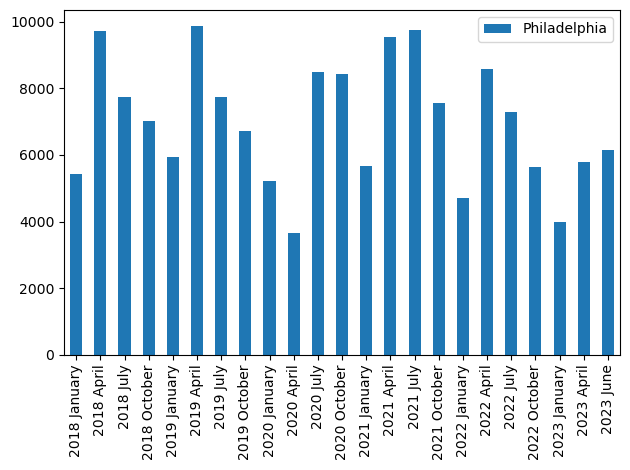

In [33]:
complete_df.plot(kind="bar")
plt.tight_layout()
plt.show()

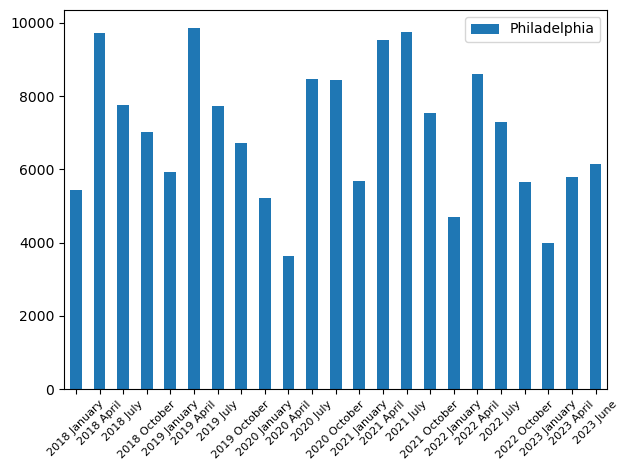

In [35]:
complete_df.plot(kind="bar")
plt.xticks(fontsize=8,rotation=45)
plt.tight_layout()
plt.savefig
plt.show()
